# MACHINE LEARNING FOR BRAIN AND COGNITION
# Lab 05: Seizure Detection (data preprocessing and feature extraction)

##Contents:

*   What is epilepsy?
*   How EEG helps?
*   Data Importing (CHB-MIT Dataset)
*   Data Cleaning
*   Data Preprocessing (MNE package)
*   Feature Extraction (mne-features package)
*   Fit Model (XGBoost)
*   Evaluation (Confusion Matrix & ROC curve)
*   Hyperparameter Tuning (Optuna Package)

## What is Epilepsy?

* Epilepsy is characterized by abnormal electrical activities of the brain nerve cells resulting (focal or generalized) in recurrent seizures, unusual behavior, and maybe the loss of consciousness.

* Epileptic seizures occur due to excessive discharges of a group (or groups) of neurons in the cerebral cortex or hippocampus.

* It is the fourth most frequent neurological condition, affecting 70 million people worldwide.

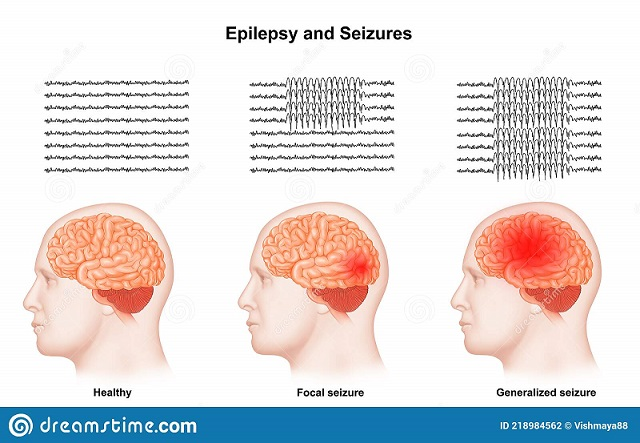

## How EEG helps?

* In order to decrease the harm of unexpected seizures and to start treatment as soon as possible, a timely and correct diagnosis of epilepsy is very compulsory for patients during a seizure state (figure 1). 


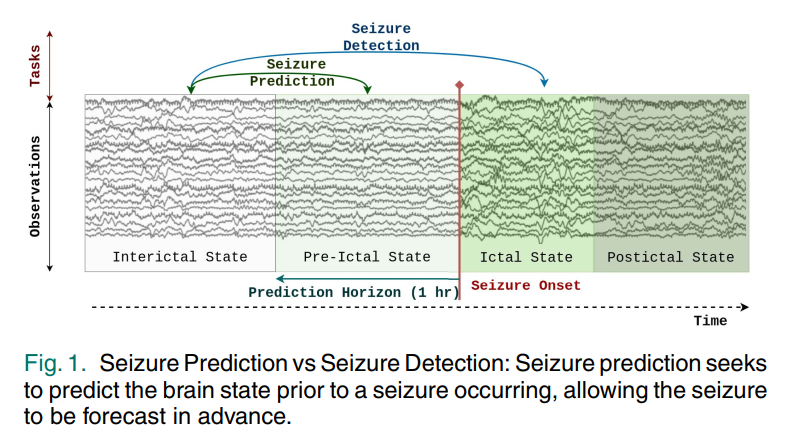

Picture reference:

"Deep Learning for Patient-Independent Epileptic Seizure Prediction Using Scalp EEG Signals," in IEEE Sensors Journal, vol. 21, no. 7, pp. 9377-9388, 1 April1, 2021.

## Import Packages

In [ ]:
import pandas as pd
import numpy as np

## Data Importing:

CHB-MIT Dataset:
* This database was collected at the Children’s Hospital Boston.
* Recordings, grouped into 23 cases, were collected from 22 subjects. 
* All signals were sampled at 256 samples per second with 16-bit resolution.
* Most files contain 23 EEG signals (24 or 26 in a few cases).
* The International 10-20 system of EEG electrode positions and nomenclature was used for these recordings.

You can find the original dataset [HERE](https://physionet.org/content/chbmit/1.0.0/) and also, you have access to the CSV format of some important parts of the data [HERE](https://ieee-dataport.org/open-access/preprocessed-chb-mit-scalp-eeg-database).

In [ ]:
seizure_df = pd.read_csv("/content/chb01_16_seizures.csv")
noseizure_df = pd.read_csv("/content/chb01_16_noseizures.csv")

In [ ]:
print("seizure_df shape:", seizure_df.shape)
print("noseizure_df shape:", noseizure_df.shape)

seizure_df shape: (13056, 23)
noseizure_df shape: (13056, 23)


Q: How many seconds does the dataset have?

seizure duration = total raw / sampling rate = 13056 / 256 = 51 (s)

noseizure duration = total raw / sampling rate = 13056 / 256 = 51 (s)

In [ ]:
seizure_df.head(3)
#noseizure_df.head(3)

,# FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000097,0.000068,0.000139,0.000074,0.000174,0.000118,0.000132,-0.000044,0.000170,0.000069,...,0.000076,0.000082,-0.000004,0.000110,0.000020,-0.000139,-0.000047,0.000078,0.000083,0.000082
1,0.000088,0.000060,0.000129,0.000078,0.000168,0.000106,0.000127,-0.000044,0.000166,0.000064,...,0.000084,0.000049,-0.000019,0.000101,0.000026,-0.000128,-0.000047,0.000124,0.000097,0.000049
2,0.000077,0.000060,0.000122,0.000074,0.000157,0.000097,0.000126,-0.000045,0.000160,0.000049,...,0.000108,0.000012,-0.000032,0.000095,0.000033,-0.000122,-0.000040,0.000153,0.000112,0.000012


## Data Cleaning:

Q: Is there duplicate channels?

Frist: list the channels name

In [ ]:
seizure_df.columns
#noseizure_df.columns

Index(['# FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3',
       'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
       'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10',
       'FT10-T8', 'T8-P8-1'],
      dtype='object')

Second: be sure the same names have the same values

In [ ]:
seizure_df[["T8-P8-0","T8-P8-1"]].describe()
#noseizure_df[["T8-P8-0","T8-P8-1"]].describe()

,T8-P8-0,T8-P8-1
count,1.305600e+04,1.305600e+04
mean,7.981697e-07,7.981697e-07
std,1.143194e-04,1.143194e-04
min,-4.589011e-04,-4.589011e-04
25%,-7.169719e-05,-7.169719e-05
50%,2.539683e-06,2.539683e-06
75%,7.716728e-05,7.716728e-05
max,4.362393e-04,4.362393e-04


Third: remove duplicate channels

In [ ]:
seizure_data = seizure_df.drop("T8-P8-1", axis=1)
noseizure_data = noseizure_df.drop("T8-P8-1", axis=1)

print("seizure data:", seizure_data.shape)
print("noseizure data:", noseizure_data.shape)

seizure data: (13056, 22)
noseizure data: (13056, 22)


Q: Is there missing values?

In [ ]:
print(seizure_data.isnull().sum())
#print(noseizure_data.isnull().sum())
print("\n")
print("total missing values in seizure: ", seizure_data.isnull().sum().sum())
print("total missing values in noseizure: ", noseizure_data.isnull().sum().sum())

# FP1-F7    0
F7-T7       0
T7-P7       0
P7-O1       0
FP1-F3      0
F3-C3       0
C3-P3       0
P3-O1       0
FP2-F4      0
F4-C4       0
C4-P4       0
P4-O2       0
FP2-F8      0
F8-T8       0
T8-P8-0     0
P8-O2       0
FZ-CZ       0
CZ-PZ       0
P7-T7       0
T7-FT9      0
FT9-FT10    0
FT10-T8     0
dtype: int64


total missing values in seizure:  0
total missing values in noseizure:  0


## Data Preprocessing:

MNE package:

Open-source Python package for exploring, visualizing, and analyzing human neurophysiological data: MEG, EEG, sEEG, ECoG, NIRS, and more.

You can find the original website [HERE](https://mne.tools/stable/index.html).

In [ ]:
!pip install mne
import mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To import our data into the mne package, firstly, we have to create an "info" variable with `mne.create_info` that needs three inputs:
* list of channels name (string values)
* sampling rate (Hz)
* type of channels (EEG, ECG,...)

In [ ]:
# create info
channels_lst = list(seizure_data.columns) # or "noseizure_data.columns"
freq = 256 # sampling rate (Hz)
ch_types = ['eeg' for _ in channels_lst] # all of our channels are EEG

info = mne.create_info(channels_lst, freq, ch_types)

We have "info" now, and we can import our data into the mne package with `mne.io.RawArray`. Then we can implement different filtering according to our needs. For example, in our case, we've used the following functions:
* `notch_filter` to filter line noise from all channels
* `filter` to bandpass filter
* `resample` to downsampling

You can find all the mne API filtering [HERE](https://mne.tools/stable/python_reference.html) and also you can find helpful information about filtering terminology [HERE](https://en.wikipedia.org/wiki/Filter_(signal_processing)).

In [ ]:
# import and filter seizure data
seizure_filtered = mne.io.RawArray(seizure_data.T, info) #transpose data from (13056, 22) to (22, 13056)
seizure_filtered.notch_filter(np.asarray([50,100], dtype=float)) #line noise filter from all channels
seizure_filtered.filter(l_freq=1,h_freq=125) #band pass filter 1-125 Hz
seizure_filtered.resample(sfreq=250, npad = "auto")  #downsampling to 250 Hz


# import and filter noseizure data
noseizure_filtered = mne.io.RawArray(noseizure_data.T, info)
noseizure_filtered.notch_filter(np.asarray([50,100], dtype=float)) 
noseizure_filtered.filter(l_freq=1,h_freq=125)
noseizure_filtered.resample(sfreq=250, npad = "auto")  

Creating RawArray with float64 data, n_channels=22, n_times=13056
    Range : 0 ... 13055 =      0.000 ...    50.996 secs
Ready.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.0s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 126.50 Hz)
- Filter length: 845 samples (3.301 sec)

Creating RawArray with float64 data, n_channels=22, n_times=13056
    Range : 0 ... 13055 =      0.000 ...    50.996 secs
Ready.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with

<RawArray | 22 x 12750 (51.0 s), ~2.2 MB, data loaded>

---
You can see band pass filtering on 1-125 Hz (gray dashed lines) and notch 
filtering on 50, and 100 Hz (two huge spikes) 

NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
<ipython-input-12-22705cfe9ee6>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mne.viz.plot_raw_psd(seizure_filtered)


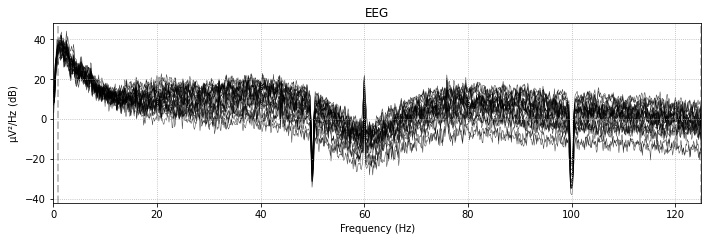

In [ ]:
mne.viz.plot_raw_psd(seizure_filtered)
#mne.viz.plot_raw_psd(noseizure_filtered)


---
Data preprocessing is done!

We need to return our data to the data frame according to feature extraction at the next step.

In [ ]:
seizure_filtered_df = (seizure_filtered.to_data_frame()).drop(labels = "time", axis = 1)
noseizure_filtered_df = (noseizure_filtered.to_data_frame()).drop(labels = "time", axis = 1)

print("Before Data Preprocessing: ")
print("  -seizure:", seizure_data.shape)
print("  -noseizure:", noseizure_data.shape)
print("\n")
print("After Data Preprocessing: ")
print("  -seizure:", seizure_filtered_df.shape)
print("  -noseizure:", noseizure_filtered_df.shape)

Before Data Preprocessing: 
  -seizure: (13056, 22)
  -noseizure: (13056, 22)


After Data Preprocessing: 
  -seizure: (12750, 22)
  -noseizure: (12750, 22)


---
Q: Is the dataset time duration changed after preprocessing? Definitely NO!

BEFORE:

seizure duration = total raw / sampling rate = 13056 / 256 = 51 (s)

noseizure duration = total raw / sampling rate = 13056 / 256 = 51 (s)

AFTER:

seizure duration = total raw / sampling rate = 12750 / 250 = 51 (s)

noseizure duration = total raw / sampling rate = 12750 / 250 = 51 (s)

## Features Extraction

 mne-features package:

This is a library that proposes Python code for feature extraction with M/EEG data.

You can find its website [HERE](https://mne.tools/mne-features/), and you can also find all APIs [HERE](https://mne.tools/mne-features/api.html).

In [ ]:
!pip install mne-features
from mne_features.feature_extraction import FeatureExtractor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We need to chunk our data into small parts and then calculate each feature. We should select a **time window** and a **step window** for this goal.

NOTE: overlapping increases the number of data and overfitting risk as well.

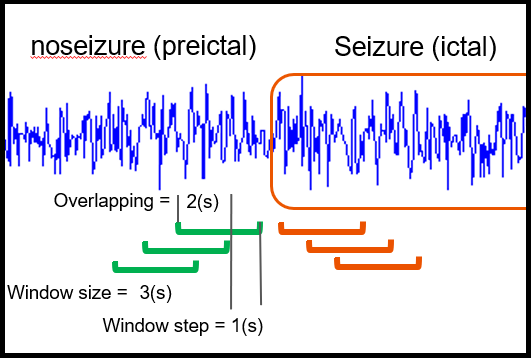

In [ ]:
dataset = []
labels = []

new_freq = 250 # after downsampling
window_size = new_freq * 3 # 3 seconds = 250*3 = 750 rows
window_step = new_freq * 1 # therefore we have 2 second overlapping = 250*2 = 500 rows

# feature extracton seizure data
seizure_transposed = np.asarray(seizure_filtered_df).T # from (12750, 22) to (22,12750)
for i in range(0, int(seizure_transposed.shape[1])-window_size, window_step):
  chuncked_data = seizure_transposed[: , i : i + window_size] #select "window_size" from all channels
  chuncked_data = np.expand_dims(chuncked_data, axis = 1)
  chuncked_data = chuncked_data.reshape(1,1,window_size * int(seizure_transposed.shape[0])) #reshape to one array for all channels window_size
  fe = FeatureExtractor(sfreq = new_freq , selected_funcs = ['mean', 'variance', 'std', 'skewness', 'kurtosis'])
  
  chuncked_data = fe.fit_transform(chuncked_data)
  dataset.extend(chuncked_data)
  labels.append(0) # assign label 0 for seizure data


# feature extraction noseizure data
noseizure_transposed = np.asarray(noseizure_filtered_df).T 
for i in range(0, int(noseizure_transposed.shape[1])-window_size, window_step):
  chuncked_data = noseizure_transposed[: , i : i + window_size] 
  chuncked_data = np.expand_dims(chuncked_data, axis = 1)
  chuncked_data = chuncked_data.reshape(1,1,window_size * int(noseizure_transposed.shape[0])) 
  fe = FeatureExtractor(sfreq = new_freq , selected_funcs = ['mean', 'variance', 'std', 'skewness', 'kurtosis'])
  
  chuncked_data = fe.fit_transform(chuncked_data)
  dataset.extend(chuncked_data)
  labels.append(1) # assign label 1 for noseizure data

dataset = np.asarray(dataset)
labels = np.asarray(labels)

print(dataset.shape)
print(labels.shape)

(96, 5)
(96,)


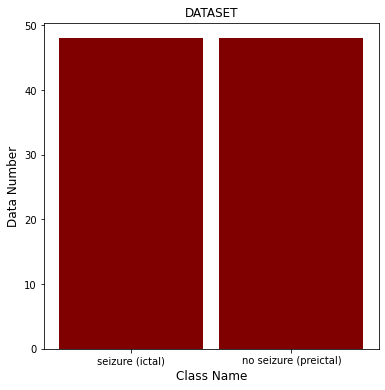

In [ ]:
# plot data 
import matplotlib.pyplot as plt

plt.close() # close all open figures first

time_sections = ["seizure (ictal)","no seizure (preictal)"]
number_images = [int(np.count_nonzero(labels == 0)), int(np.count_nonzero(labels == 1))]
fig = plt.figure(figsize = (6, 6))
plt.bar(time_sections, number_images, color ='maroon', width = 0.9)
plt.xlabel("Class Name",fontsize=12)
plt.ylabel("Data Number",fontsize=12)
plt.title("DATASET",fontsize=12)
plt.show()

# Lab 06: Seizure Detection (fit model, evaluation, and tuning)

## Fit Model (XGBoost)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import RocCurveDisplay, auc


cv = KFold(n_splits=5, random_state=1, shuffle=True)
sc = StandardScaler() #feature scaling
classifier = XGBClassifier(eval_metric='mlogloss', use_label_encoder =False)

# for confusion matrix
cm = np.zeros((2, 2))
accuracy = []
sensitivity = []
specificity = []

# for ROC curve
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,6))

for i, (train,test) in enumerate(cv.split(dataset)): 
    X_train, y_train, X_test, y_test = dataset[train], labels[train], dataset[test], labels[test]

    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    #confusion matrix
    cm += confusion_matrix(y_test, y_pred)
    accuracy.append(accuracy_score(y_test, y_pred)) #accuracy
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity.append(tp / (tp+fn)) #sensitivity
    specificity.append(tn / (tn+fp)) #specificity

    #ROC curve
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        name="ROC fold {}".format(i+1),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

print("Results are READY!")

Results are READY!


You can find more information about **sensitivity** and **specificity** [HERE](https://en.wikipedia.org/wiki/Sensitivity_and_specificity).

You can find more information about the **plot confusion matrix** [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).

You can find more information about **plotting the ROC curve** [HERE](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html).

## Evaluation

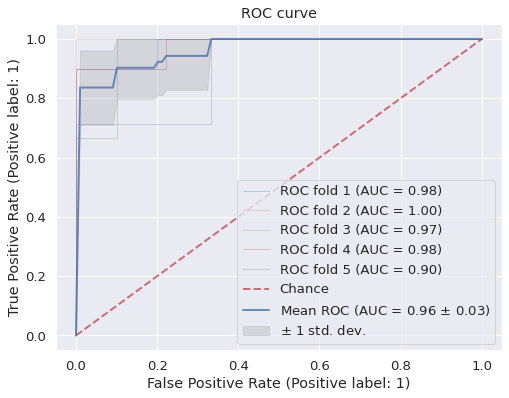

In [ ]:
# plot ROC curve
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="ROC curve",
)
ax.legend(loc="lower right")

plt.show()

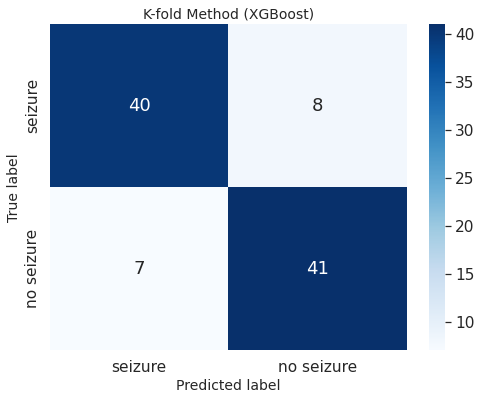


Accuracy:    84.32 %
Sensitivity: 84.29 %
Specificity: 84.00 %


In [ ]:
# plot confusion matrix
plt.close()
time_sections = ["seizure","no seizure"]
plt.figure(figsize = (8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g', xticklabels = time_sections, yticklabels = time_sections, annot_kws={"size": 18})
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title( "K-fold Method (XGBoost)", fontsize=14)
plt.show()

print("\n===================================================================")
print("Accuracy:    {:.2f} %".format(np.asarray(accuracy).mean()*100))
print("Sensitivity: {:.2f} %".format(np.asarray(sensitivity).mean()*100))
print("Specificity: {:.2f} %".format(np.asarray(specificity).mean()*100))
print("===================================================================")

## Hyperparameters Tuning (Optuna)

Optuna package:

An open-source hyperparameter optimization framework to automate hyperparameter search.

You can find Optuna's website [HERE](https://optuna.org/), and you can also find some examples for using it in different tasks [HERE](https://github.com/optuna/optuna-examples).

In [ ]:
!pip install optuna
import optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

def objective(trial):

    dtrain = xgb.DMatrix(dataset, label=labels)

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "test-auc")
    history = xgb.cv(param, dtrain, num_boost_round=100, callbacks=[pruning_callback])

    mean_auc = history["test-auc-mean"].values[-1]
    return mean_auc


if __name__ == "__main__":
    pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
    study = optuna.create_study(pruner=pruner, direction="maximize")
    study.optimize(objective, n_trials=100)

    print("================================================")
    trial = study.best_trial
    print("Best Accuracy: {:.2f} %".format(trial.value*100))
    print("Best Hyperparameters: {}".format(trial.params))
    print("================================================")


[I 2022-11-23 15:57:27,937] A new study created in memory with name: no-name-baa34ad4-51d9-4306-b816-b6c355f51eea
[I 2022-11-23 15:57:28,075] Trial 0 finished with value: 0.9430646666666668 and parameters: {'booster': 'dart', 'lambda': 0.003983028670596574, 'alpha': 0.021909107456911985, 'max_depth': 2, 'eta': 0.08048015557554711, 'gamma': 0.010761154398778255, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.012557576659639382, 'skip_drop': 0.0024618109273300084}. Best is trial 0 with value: 0.9430646666666668.
[I 2022-11-23 15:57:28,143] Trial 1 finished with value: 0.9721816666666667 and parameters: {'booster': 'gblinear', 'lambda': 2.7430132669913753e-06, 'alpha': 0.00010643290639661}. Best is trial 1 with value: 0.9721816666666667.
[I 2022-11-23 15:57:28,191] Trial 2 finished with value: 0.980125 and parameters: {'booster': 'gblinear', 'lambda': 1.398836710417247e-07, 'alpha': 0.1936306707129885}. Best is trial 2 with value: 0.98012

Best Accuracy: 98.01 %
Best Hyperparameters: {'booster': 'gblinear', 'lambda': 1.398836710417247e-07, 'alpha': 0.1936306707129885}


In [ ]:
# compare accuracy after tuning

print("Accuracy before tuning:  {:.2f} %".format(np.asarray(accuracy).mean()*100))
print("Accuracy after tuning:   {:.2f} %".format(trial.value*100))

Accuracy before tuning:  84.32 %
Accuracy after tuning:   98.01 %


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

## References and more articles for curiosity:

* OShea, A., Ahmed, R., Lightbody, G., Mathieson, S., Pavlidis, E., Lloyd, R., ... & Temko, A. (2021). Deep learning for EEG seizure detection in preterm infants. arXiv preprint arXiv:2106.00611.

* B. Abdi-Sargezeh, A. Valentin, G. Alarcon and S. Sanei, "Incorporating Uncertainty In Data Labeling Into Detection of Brain Interictal Epileptiform Discharges From EEG Using Weighted optimization," ICASSP 2021 - 2021 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP), 2021, pp. 1000-1004, doi: 10.1109/ICASSP39728.2021.9414463.

* Thangavel, P., Thomas, J., Peh, W. Y., Jing, J., Yuvaraj, R., Cash, S. S., ... & Dauwels, J. (2021). Time–Frequency Decomposition of Scalp Electroencephalograms Improves Deep Learning-Based Epilepsy Diagnosis. International Journal of Neural Systems, 31(08), 2150032.

* Ozdemir, M. A., Cura, O. K., & Akan, A. (2021). Epileptic eeg classification by using time-frequency images for deep learning. International Journal of Neural Systems, 2150026.

* Abrol, A., Fu, Z., Salman, M. et al. Deep learning encodes robust discriminative neuroimaging representations to outperform standard machine learning. Nat Commun 12, 353 (2021).

* Shoeibi A, Khodatars M, Ghassemi N, Jafari M, Moridian P, Alizadehsani R, Panahiazar M, Khozeimeh F, Zare A, Hosseini-Nejad H, Khosravi A, Atiya AF, Aminshahidi D, Hussain S, Rouhani M, Nahavandi S, Acharya UR. Epileptic Seizures Detection Using Deep Learning Techniques: A Review. International Journal of Environmental Research and Public Health. 2021; 18(11):5780.

* Craik, A., He, Y., & Contreras-Vidal, J. L. (2019). Deep learning for electroencephalogram (EEG) classification tasks: a review. Journal of neural engineering, 16(3), 031001.

* Lundervold, A. S., & Lundervold, A. (2019). An overview of deep learning in medical imaging focusing on MRI. Zeitschrift für Medizinische Physik, 29(2), 102-127.
